In [2]:
import nltk
import string
import scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /home/gabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gabe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# import the Fake.csv and True.csv files
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [8]:
nltk.download('punkt')
true_string = ''.join(true["text"])
true_tokenized = nltk.word_tokenize(true_string)

[nltk_data] Downloading package punkt to /home/gabe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
fake_string = ''.join(fake["text"])
fake_tokenized = nltk.word_tokenize(fake_string)

In [10]:
true_tokenized = [word.lower() for word in true_tokenized if word.isalnum() or (not "." and not "," and not "?" and not "!")]

In [11]:
fake_tokenized = [word.lower() for word in fake_tokenized if word.isalnum() or (not "." and not "," and not "?" and not "!")]

In [12]:
fdist_true = FreqDist(true_tokenized)
print("True: " + str(fdist_true.most_common(100)))

True: [('the', 482174), ('to', 245124), ('of', 204957), ('a', 197860), ('and', 181686), ('in', 180668), ('on', 108342), ('s', 99899), ('said', 99024), ('that', 88095), ('for', 79728), ('is', 55428), ('with', 54485), ('he', 54368), ('trump', 54238), ('it', 49335), ('was', 47940), ('by', 47637), ('as', 47307), ('has', 46242), ('from', 39376), ('his', 38016), ('not', 37589), ('have', 36413), ('be', 34291), ('at', 33164), ('an', 32710), ('would', 31524), ('reuters', 28412), ('who', 27642), ('but', 26596), ('president', 26386), ('are', 26125), ('had', 25672), ('will', 25238), ('we', 22163), ('they', 22064), ('its', 21319), ('this', 21019), ('which', 20809), ('state', 19726), ('been', 19598), ('after', 19375), ('were', 18916), ('government', 18285), ('about', 17422), ('more', 17192), ('i', 17020), ('their', 16826), ('new', 16743), ('house', 16513), ('states', 16506), ('also', 15946), ('united', 15575), ('republican', 15346), ('people', 15126), ('or', 15107), ('told', 14244), ('over', 13839),

In [13]:
fdist_fake = FreqDist(fake_tokenized)
print("Fake: " + str(fdist_fake.most_common(100)))

Fake: [('the', 527326), ('to', 289638), ('of', 235777), ('and', 224519), ('a', 210576), ('in', 164579), ('that', 150256), ('s', 129631), ('is', 110825), ('for', 92017), ('on', 81064), ('it', 78808), ('he', 77607), ('trump', 74038), ('was', 67786), ('with', 62876), ('his', 58036), ('as', 55766), ('this', 55177), ('be', 48557), ('by', 47334), ('not', 46802), ('are', 46336), ('have', 46027), ('they', 45176), ('i', 43726), ('who', 42270), ('has', 42252), ('at', 41516), ('from', 40740), ('t', 40531), ('you', 40191), ('we', 38002), ('an', 34808), ('about', 32826), ('but', 31403), ('said', 31125), ('their', 30202), ('people', 25997), ('she', 25745), ('her', 25701), ('president', 25591), ('or', 24671), ('what', 24475), ('all', 24430), ('will', 24044), ('would', 23457), ('been', 22991), ('out', 22917), ('one', 22881), ('more', 22371), ('if', 21881), ('were', 21607), ('when', 21044), ('can', 20690), ('had', 20425), ('just', 20057), ('our', 19705), ('so', 19064), ('there', 18801), ('up', 18296), 

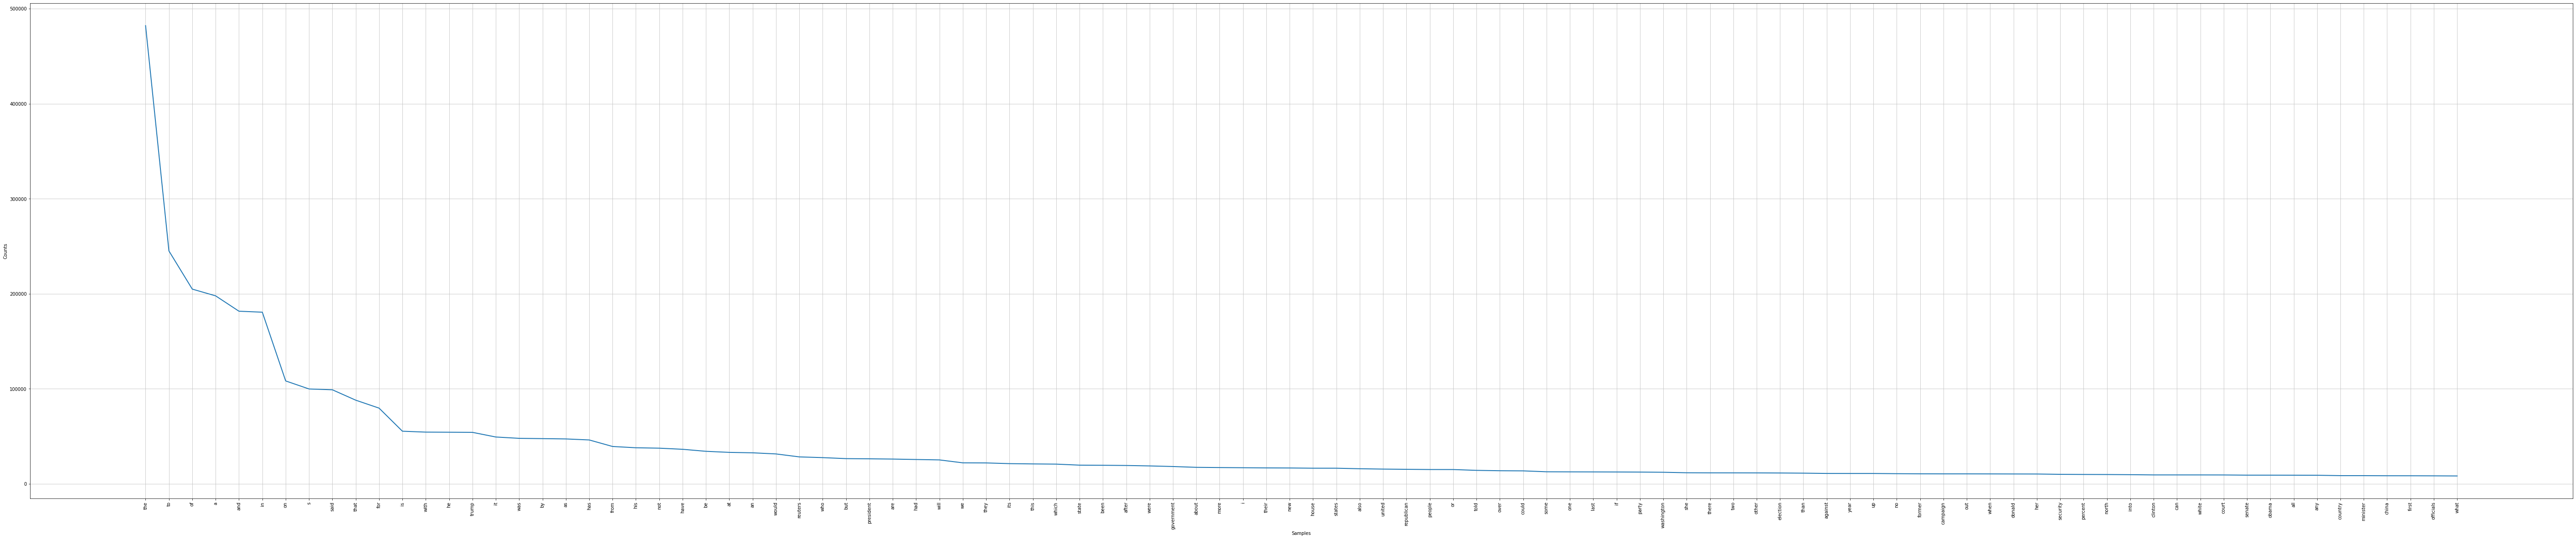

In [14]:
fig = plt.figure(figsize = (100,20))
fdist_true.plot(100,cumulative=False)
plt.show()
fig.savefig('true_freq.png', bbox_inches = "tight")

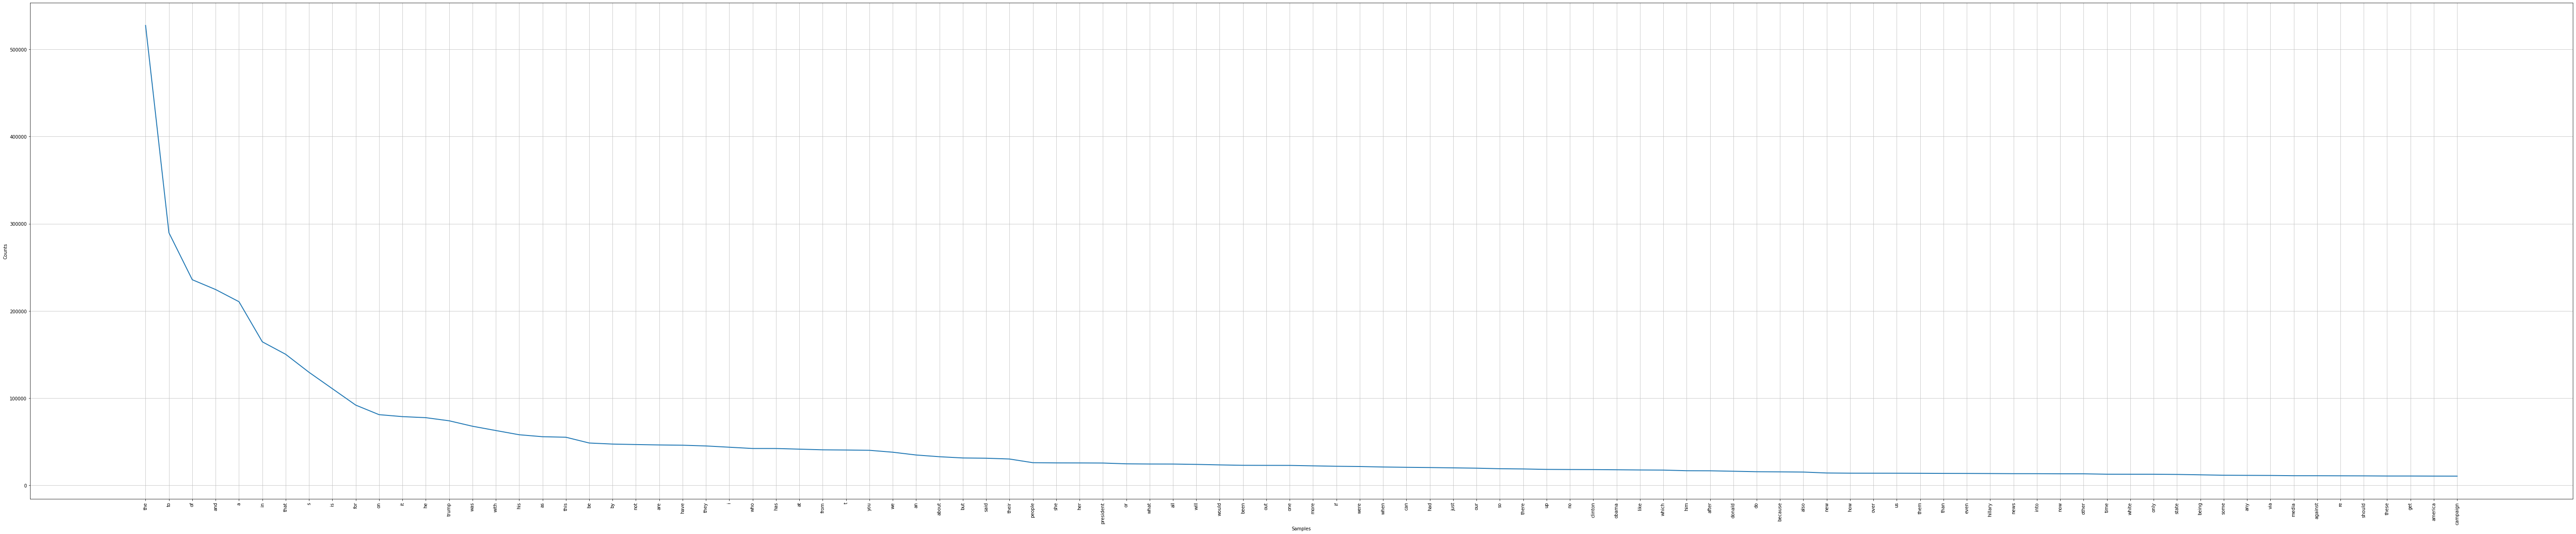

In [15]:
fig = plt.figure(figsize = (100,20))
fdist_fake.plot(100,cumulative=False)
plt.show()
fig.savefig('fake_freq.png', bbox_inches = "tight")

In [16]:
stop_words = stopwords.words('english')
true_tokenized = [word for word in true_tokenized if word not in stop_words]
fake_tokenized = [word for word in fake_tokenized if word not in stop_words]

In [17]:
fdist_true = FreqDist(true_tokenized)
print("True: " + str(fdist_true.most_common(100)))

True: [('said', 99024), ('trump', 54238), ('would', 31524), ('reuters', 28412), ('president', 26386), ('state', 19726), ('government', 18285), ('new', 16743), ('house', 16513), ('states', 16506), ('also', 15946), ('united', 15575), ('republican', 15346), ('people', 15126), ('told', 14244), ('could', 13709), ('one', 12670), ('last', 12612), ('party', 12434), ('washington', 12238), ('two', 11619), ('election', 11474), ('year', 10968), ('former', 10601), ('campaign', 10554), ('donald', 10447), ('security', 10071), ('percent', 9936), ('north', 9868), ('clinton', 9453), ('white', 9443), ('court', 9404), ('senate', 9204), ('obama', 9197), ('country', 8685), ('minister', 8660), ('china', 8561), ('first', 8546), ('officials', 8474), ('since', 8332), ('tuesday', 8263), ('democratic', 8237), ('week', 8217), ('foreign', 8196), ('administration', 8191), ('national', 8184), ('including', 8119), ('presidential', 8011), ('wednesday', 8008), ('military', 7996), ('russia', 7821), ('may', 7811), ('law',

In [18]:
fdist_fake = FreqDist(fake_tokenized)
print("Fake: " + str(fdist_fake.most_common(100)))

Fake: [('trump', 74038), ('said', 31125), ('people', 25997), ('president', 25591), ('would', 23457), ('one', 22881), ('clinton', 18074), ('obama', 17865), ('like', 17643), ('donald', 16188), ('also', 15243), ('new', 14173), ('us', 13914), ('even', 13666), ('hillary', 13549), ('news', 13406), ('time', 12782), ('white', 12762), ('state', 12532), ('via', 11348), ('media', 11050), ('get', 10705), ('america', 10613), ('campaign', 10561), ('house', 10559), ('know', 10287), ('could', 10223), ('first', 10016), ('american', 9937), ('going', 9745), ('many', 9695), ('image', 9622), ('states', 9522), ('make', 9143), ('told', 9103), ('republican', 8928), ('right', 8896), ('country', 8684), ('made', 8666), ('government', 8600), ('police', 8564), ('say', 8551), ('way', 8457), ('back', 8397), ('think', 8358), ('two', 8308), ('years', 8259), ('video', 8068), ('election', 8019), ('united', 7974), ('last', 7771), ('may', 7628), ('political', 7546), ('party', 7459), ('black', 7454), ('see', 7305), ('want'

In [19]:
lemmatizer = WordNetLemmatizer()
true_tokenized = [lemmatizer.lemmatize(word) for word in true_tokenized]
fake_tokenized = [lemmatizer.lemmatize(word) for word in fake_tokenized]

In [20]:
fdist_true = FreqDist(true_tokenized)
print("True: " + str(fdist_true.most_common(100)))

True: [('said', 99024), ('trump', 54269), ('state', 36232), ('would', 31524), ('reuters', 28412), ('president', 26928), ('republican', 22095), ('government', 19430), ('year', 18710), ('house', 16900), ('new', 16743), ('also', 15946), ('united', 15575), ('people', 15193), ('party', 14962), ('official', 14575), ('told', 14244), ('country', 13924), ('election', 13900), ('could', 13709), ('one', 13019), ('last', 12630), ('washington', 12238), ('two', 11619), ('group', 11103), ('campaign', 11072), ('former', 10601), ('leader', 10498), ('donald', 10447), ('week', 10417), ('security', 10374), ('court', 10336), ('percent', 9936), ('say', 9930), ('north', 9868), ('minister', 9541), ('white', 9500), ('clinton', 9499), ('tax', 9225), ('law', 9214), ('senate', 9204), ('obama', 9197), ('time', 9037), ('vote', 8976), ('month', 8754), ('china', 8562), ('first', 8547), ('national', 8533), ('statement', 8521), ('administration', 8375), ('since', 8332), ('tuesday', 8263), ('democratic', 8237), ('foreign

In [21]:
fdist_fake = FreqDist(fake_tokenized)
print("Fake: " + str(fdist_fake.most_common(100)))

Fake: [('trump', 74200), ('said', 31125), ('president', 26158), ('people', 26080), ('one', 23698), ('would', 23457), ('state', 22054), ('clinton', 18706), ('like', 18190), ('obama', 17865), ('time', 17773), ('donald', 16188), ('american', 16057), ('republican', 15872), ('say', 15519), ('also', 15243), ('year', 14838), ('new', 14173), ('u', 14173), ('even', 13667), ('hillary', 13554), ('news', 13406), ('white', 13111), ('right', 12692), ('get', 12225), ('know', 11947), ('make', 11525), ('via', 11348), ('woman', 11198), ('medium', 11128), ('campaign', 11067), ('country', 10767), ('house', 10729), ('america', 10668), ('image', 10506), ('could', 10223), ('first', 10025), ('want', 9813), ('think', 9764), ('going', 9749), ('many', 9695), ('way', 9387), ('election', 9289), ('day', 9210), ('told', 9103), ('government', 9076), ('thing', 8944), ('video', 8825), ('made', 8666), ('law', 8604), ('back', 8601), ('police', 8574), ('go', 8438), ('two', 8309), ('black', 8040), ('show', 8032), ('party',

In [3]:
true['label']=0
fake['label']=1
true_pandas = pd.DataFrame(true.to_numpy())
fake_pandas = pd.DataFrame(fake.to_numpy())
data = pd.concat([true_pandas,fake_pandas])
print(data[4])

0        0
1        0
2        0
3        0
4        0
        ..
23476    1
23477    1
23478    1
23479    1
23480    1
Name: 4, Length: 44898, dtype: object


In [23]:

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
data_clean = cv.fit_transform(data[1])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_clean, data[4].astype("int"), test_size=0.2, random_state=0)

In [31]:
# Tfid Dataset
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data[1])

TypeError: expected string or bytes-like object

In [26]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(text_tf, data[4].astype("int"), test_size=0.3, random_state=123)

In [42]:
print(text_tf[:10])

  (0, 120422)	0.021726288707365357
  (0, 91996)	0.034696172669291044
  (0, 5762)	0.037308226519177826
  (0, 40015)	0.047994802860253045
  (0, 41159)	0.020508394930353672
  (0, 22334)	0.028310492024711264
  (0, 118189)	0.052629774314473333
  (0, 92931)	0.03879426721511263
  (0, 87607)	0.03844727576092112
  (0, 107602)	0.027732488694893816
  (0, 53165)	0.04611008250337714
  (0, 9922)	0.01186190829274023
  (0, 18162)	0.050032270505222194
  (0, 7377)	0.04420924913542457
  (0, 11895)	0.009764149396508999
  (0, 10261)	0.0904224509898095
  (0, 38141)	0.03215349822708779
  (0, 96878)	0.03262819066094961
  (0, 92902)	0.03674659826857477
  (0, 47476)	0.02554764585999276
  (0, 43010)	0.05553149421996583
  (0, 96489)	0.030485419063339455
  (0, 117907)	0.01648931464399567
  (0, 57564)	0.03080136304436219
  (0, 98026)	0.03341668581561574
  :	:
  (9, 42229)	0.1353434208572287
  (9, 49109)	0.0539330351911442
  (9, 24318)	0.2736213782541196
  (9, 29216)	0.09656042091952696
  (9, 97681)	0.09482172970069

In [35]:
# Create POS tag dataset

full_tokenized = true_tokenized + fake_tokenized
pos_tag = nltk.pos_tag(full_tokenized)

In [4]:
pos_tag_tokens_true = []
for p in true['text']:
	token = nltk.word_tokenize(p)
	pos = nltk.pos_tag(token)
	pos_tag_tokens_true.append(pos)

In [5]:
pos_tag_tokens_fake = []
for p in fake['text']:
	token = nltk.word_tokenize(p)
	pos = nltk.pos_tag(token)
	pos_tag_tokens_fake.append(pos)

In [6]:
# Create a list of just nouns from pos_tag_tokens_true
nouns_true = []
for p in pos_tag_tokens_true:
	nouns = [word for word,pos in p if pos == 'NN']
	nouns_true.append(nouns)

In [7]:
# Create a list of just nouns from pos_tag_tokens_fake
nouns_fake = []
for p in pos_tag_tokens_fake:
	nouns = [word for word,pos in p if pos == 'NN']
	nouns_fake.append(nouns)

In [10]:
nouns = nouns_true + nouns_fake

In [20]:
print(nouns[-10:])

[['week', 'prisoner', 'swap', 'end', 'way', 'everyone', 'side', 'side', 'flight', 'prisoner', 'exchange', 'way', 'prisoner', 'swap', 'home', 'part', 'deal', 'republic', 'flight', 'exchange', 'place', 'are.Three', 'journalist', 'pastor', 'day', 'story'], ['desire', 'torpor', 'din', 'distractions.More', 'mainstream', 'fake', 'sophistication', 'group', 'rate', 'expansion', 'purpose', 'left', 'regard.The', 'way', 'change', 'left', 'favor', 'approval', 'power', 'status', 'quo', 'right', 'population', 'authority', 'rent', 'sale', 'power', 'contrast', 'fake', 'money', 'fame', 'preservation', 'place', 'ivory', 'class', 'lifestyle', 'path', 'machine', 'book', 'speaking', 'radio', 'television', 'paralysis', 's', 'process', 'disorder', 'hope', 'change', 'shock', 'doctrine', 'disaster', 'capitalism', 'climate', 'capitalism', 'function', 'fake', 'defense', 'anger', 'way', 'confusion', 'impetus', 'futility', 'contagion', 'dissent', 'beginning', 'blockage', 'dissipate', 'image', 'matter', 'Today', 's

In [14]:
# Create a list of labels for the nouns
nouns_labels = [0] * len(nouns_true) + ([1] * len(nouns_fake))

In [11]:
# Create dataset split with nouns
X_train_nouns, X_test_nouns, y_train_nouns, y_test_nouns = train_test_split(nouns, nouns_labels, test_size=0.3, random_state=123)

In [51]:
# Create dataset split with verbs
X_train_verbs, X_test_verbs, y_train_verbs, y_test_verbs = train_test_split(verbs, verbs_labels, test_size=0.3, random_state=123)

In [18]:
print(nouns_labels[:10])
print(nouns_labels[-10:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [38]:
pos_tag_x = []
for i in range(len(true_tokenized)):
    pos_tag_x.append(0)
for i in range(len(fake_tokenized)):
    pos_tag_x.append(1)

In [39]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(pos_tag, pos_tag_x, test_size=0.3, random_state=123)

In [28]:
# Raw Dataset
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision: " + str(metrics.precision_score(y_test, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test, predicted, average='macro')))

MultinomialNB Accuracy: 0.9552338530066815
Precision: 0.9551148627813753
Recall: 0.955224392255449


In [29]:
# Tfidf dataset
clf = MultinomialNB().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

MultinomialNB Accuracy: 0.9398663697104677
Precision: 0.9400419928334367
Recall: 0.9391462978265337


In [12]:
# Nouns dataset
clf = MultinomialNB().fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

/home/gabe/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: Expected 2D array, got 1D array instead:
array=[list(['student', 'art', 'contest', 'painting', 'stir', 'painting', 'symbol', 'symbol', 'islam', 'hijab', 'student', 'hijab', 'congressman', 'office', 'violation', 'separation', 'church', 'state', 'activist', 'group', 'enforcement', 'immigration', 'laws.The', 'group', 'success', 'painting', 'congressman', 'student', 'art', 'competition.Because', 'complaint', 'advice', 'issue', 'protest', 'district', 'office', 'example', 'congressman', 'resident', 'activist', 'anything', 'office'])
 list(['Tune', 'broadcast', 'broadcast', 'talk', 'radio', 'custom-made', 'bar', 'fly', 'street', 'corner', 'media-maniacs', 'rascals.Join', 'contributor', 'contributor', 'episode', 'tune', 'hang', 'boil', 'analysis', 'gnashing', 'teeth', 'reject', 'club.This', 'week', 'show', 'role', 'engineering', 'protest', 'news', 'death', 'share', 'program', 'donate', 'page', 'Reference'])
 list(['favoring', 'dispute', 'neighbor', 'way', 'development', 'drilling', 'multi-billion', 'dollar', 'deepwater', 'oil', 'gas', 'project', 'row', 'development', 'oil', 'oil', 'percent', 'world', 's', 'cocoa', 'd', 'official', 'court', 'tribunal', 'correspond', 'claim', 'party', 'angle', 'line', 'news', 'judgment', 'position', 'television', 'dispute', 'work', 'drilling', 'part', 'plan', 'development', 'potential', 'executive', 'oil', 'company', 'lead', 'operator', 'project', 'statement', 'end', 'year', 'production', 'capacity', 'production', 'storage', 'vessel', 'day', 'bpd', 'project', 'ruling', 'claim', 'line', 'relief', 'oil', 'growth', 'crisis', 'compensation', 'oil', 'field', 'area', 'claim', 'loss', 'contract', 'loss', 'revenue', 'economy', 'debt', 'project', 'gold', 'producer', 'oil', 'neighbor', 'oil', 'claim', 'deal', 'border', 'sea'])
 ...
 list(['Defense', 'military', 'ambush', 'week', 'incident', 'affiliate', 'spotlight', 'counterterrorism', 'mission', 'country', 'incident', 'time', 'ambush', 'place', 'area', 'enemy', 'patrol', 'aircraft', 'delay', 'something', 'stance', 'lot', 'board', 'plane', 'patrol', 'dozen', 'attack', 'dozen', 'security', 'source', 'ambush', 'diplomat', 'knowledge', 'incident', 'intelligence', 'contingency', 'place', 'combat', 'mission', 'assistance', 'army', 'intelligence', 'surveillance', 'reconnaissance'])
 list(['conviction', 'gay', 'man', 'officer', 's', 'conviction', 'judge', 'gay', 'vice', 'squad.The', 'judge', 's', 'client', 's', 'conviction', 'conduct', 'exposure', 'nature', 'conduct', 'community', 's', 'case', 'officer', 'restroom', 'part', 'officer', 'himself.Dhanidina', 'presence', 'decoy', 'judge', 'vice', 'squad', 'conduct', 'police', 'department', 'sex', 'stings.While', 'police', 'department', 'response', 'conduct', 'judge', 'argument', 'evidence', 'police', 'gay', 'men.Jim', 'spokesman', 'police', 'sex', 'councilman', 'expert', 'witness', 'conduct', 'era', 'homosexuality', 'leftover', 'century', 'judge', 's', 'decision', 'step', 'police', 'country.Last', 'year', 'police', 'ban', 'video', 'way', 'racism', 'way', 'homophobia', 'multitude', 'police', 'target', 'entrap', 'criminalize', 'community.Photo'])
 list(['gold', 'trader', 'support', 'name', 'business', 'trader', 'court', 'filing', 'lira', 'percent', 'dollar', 'filing', 'wrongdoing', 'case', 'relationship', 'lawyer', 'request', 'comment', 'government', 'government', 'scheme', 'banker', 'custody', 'trial', 'filing', 's', 'delay', 'amount', 'work', 'difficulty', 'trial', 'preparation', 'jail', 'filing', 'government', 'evidence', 'trial', 'government', 'banking', 'scheme', 'filing', 'phone', 'call', 'defendant', 'bank', 'conduit', 'minister', 'wedding', 'day', 'wedding', 'co-defendant', 'license', 'bank', 'regulator', 'bank', 'filing', 's', 'case', 'defendant', 'trial', 'speculation', 'plea', 'case', 'et', 'al'])].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Raw dataset
clf = LogisticRegression().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision: " + str(metrics.precision_score(y_test, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test, predicted, average='macro')))

Error: Session cannot generate requests

In [22]:
# Tfidf dataset
clf = LogisticRegression().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

Logistic Regression Accuracy: 0.985894580549369
Precision: 0.9858243780667695
Recall: 0.9858433528667342


In [ ]:
# POS Tagging dataset
clf = LogisticRegression().fit(X_train_pos, y_train_pos)
predicted= clf.predict(X_test_pos)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_pos, predicted))
print("Precision: " + str(metrics.precision_score(y_test_pos, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_pos, predicted, average='macro')))

In [23]:
# Classification using SVM
# Raw datset
clf = SVC().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision: " + str(metrics.precision_score(y_test, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test, predicted, average='macro')))

In [ ]:
# Tfidf dataset
clf = SVC().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("SVM Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

In [ ]:
# POS Tagging dataset
clf = SVC().fit(X_train_pos, y_train_pos)
predicted= clf.predict(X_test_pos)
print("SVM Accuracy:",metrics.accuracy_score(y_test_pos, predicted))
print("Precision: " + str(metrics.precision_score(y_test_pos, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_pos, predicted, average='macro')))

In [ ]:
# Classification using Random Forest


In [11]:
# Raw dataset
clf = RandomForestClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision: " + str(metrics.precision_score(y_test, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test, predicted, average='macro')))


Random Forest Accuracy: 0.9909799554565701
Precision: 0.9908992367012026
Recall: 0.9910414503395818


In [ ]:
# Tfidf dataset
clf = RandomForestClassifier().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

In [ ]:
# POS Tagging dataset
clf = RandomForestClassifier().fit(X_train_pos, y_train_pos)
predicted= clf.predict(X_test_pos)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test_pos, predicted))
print("Precision: " + str(metrics.precision_score(y_test_pos, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_pos, predicted, average='macro')))

In [ ]:
# After applying "POS Tagging", you can locate specific kinds of words in the collection, e.g.,nouns and verbs. 
# Please build additional classifier(s) to classify the news by leveraging POSinformation, e.g., only use the "nouns" or "adj" + "noun" as features. 
# Did you witness theperformance improvement (compared with the result from task 2)? why?

In [11]:
# Use pos_tag to extract the parts of speech
def pos_tag(text):
    return [word for word,pos in nltk.pos_tag(nltk.word_tokenize(text))]

In [14]:
# POS Tagging
pos_tagged = []
for i in range(0,len(data[1])):
	pos_tag = pos_tag(data[1][i])
	pos_tagged.append(pos_tag)

print(pos_tagged[0])

TypeError: expected string or bytes-like object

In [11]:
# Use POS Tagging to extract Nouns
import nltk
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

def is_noun(tag):
    return tag in ['NN', 'NNS', 'NNP', 'NNPS']

# Do POS tagging on the text looking for nouns only using multi threading




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gabe/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


TypeError: expected string or bytes-like object

In [ ]:
# Use the nouns to train a model
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
data_clean = cv.fit_transform(nouns)